In [ ]:
from IPython.core.display import HTML
with open('style.css', 'r') as file:
    css = file.read()
HTML(css)

# Solving a Fixed-Point Equation

Assume we want to find a solution of the equation
$$ x = \cos(x).  $$
As a first step, we would try to visualize the situation and plot both the function $y = \cos(x)$ and the line $y = x$.  This is done in the following cell:

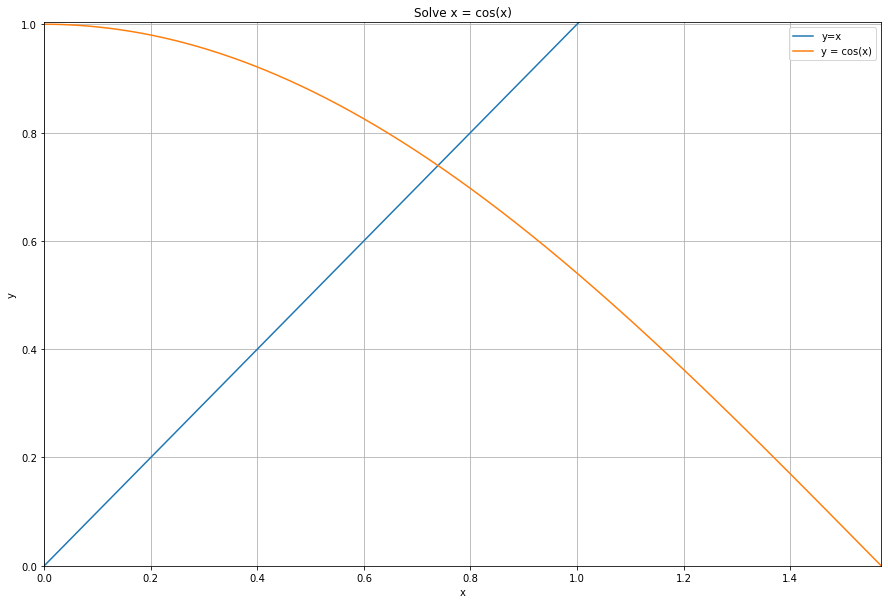

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

import math

plt.rcParams['figure.figsize'] = [15, 10]
n = 1000
x = [         0.5 * math.pi * i / 1000  for i in range(1001)]
y = [math.cos(0.5 * math.pi * i / 1000) for i in range(1001)]
plt.margins(0.00)
plt.plot(x[:640], x[:640], label="y=x")
plt.plot(x, y, label="y = cos(x)")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Solve x = cos(x)")
plt.show()
# plt.savefig("xEqualsCosX.pdf")

The figure above clearly shows that the line $y = x$ intersects the function $y = \cos(x)$ at some point $\bar{x}$ that lies somewhere in the intervall $[0.6, 0.8]$.  In order to compute $\bar{x}$, we try the following 
<em style="color:blue">fixed-point iteration</em>.
<ol>
    <li> We initialize $x_0$ with the value $1.0$. </li>
    <li> We define $x_{n+1} := \cos(x_n)$.
</ol>

Our hope is that the sequence $(x_n)_{n\in\mathbb{N}}$ converges to the solution $\bar{x}$, i.e. we hope that
$$ \lim\limits_{n\rightarrow\infty} x_n = \bar{x}. $$
Why should this be true?  Well let us assume that the limit of this sequence exists and define
$$ \bar{x} := \lim\limits_{n\rightarrow\infty} x_n. $$
Then we have the following:
$$
  \begin{array}{lcl}
  \cos\bigl(\bar{x}\bigr) & = & \cos\Bigl(\lim\limits_{n\rightarrow\infty} x_n\Bigr) \\
                          & = & \lim\limits_{n\rightarrow\infty} \cos(x_n)           \\
                          & = & \lim\limits_{n\rightarrow\infty} x_{n+1}       \\
                          & = & \lim\limits_{n\rightarrow\infty} x_{n}         \\
                          & = & \bar{x}
  \end{array}
$$

Therefore, if the sequence converges to some limit, ten the limit is indeed a solution of the equation $x = \cos(x)$.  The question whether the sequence does indeed converge is decided <em style="color:blue">experimentally</em> as follows:

In [5]:
import math

x     = 1.0
old_x = 0.0
i     = 1
while abs(x - old_x) >= 4.0E-16:
    old_x = x
    x = math.cos(x)
    print(f'{i} : {x}')
    i += 1

1 : 0.5403023058681398
2 : 0.8575532158463934
3 : 0.6542897904977791
4 : 0.7934803587425656
5 : 0.7013687736227565
6 : 0.7639596829006542
7 : 0.7221024250267077
8 : 0.7504177617637605
9 : 0.7314040424225098
10 : 0.7442373549005569
11 : 0.7356047404363474
12 : 0.7414250866101092
13 : 0.7375068905132428
14 : 0.7401473355678757
15 : 0.7383692041223232
16 : 0.7395672022122561
17 : 0.7387603198742113
18 : 0.7393038923969059
19 : 0.7389377567153445
20 : 0.7391843997714936
21 : 0.7390182624274122
22 : 0.7391301765296711
23 : 0.7390547907469174
24 : 0.7391055719265363
25 : 0.7390713652989449
26 : 0.7390944073790913
27 : 0.739078885994992
28 : 0.7390893414033927
29 : 0.7390822985224024
30 : 0.7390870426953322
31 : 0.7390838469650002
32 : 0.7390859996481299
33 : 0.7390845495752126
34 : 0.7390855263619245
35 : 0.7390848683867142
36 : 0.7390853116067619
37 : 0.7390850130484203
38 : 0.7390852141609171
39 : 0.739085078689123
40 : 0.7390851699445544
41 : 0.7390851084737987
42 : 0.7390851498812394
43 

It seems that the sequence $(x_n)_{n\in\mathbb{N}}$ does indeed converge and the solution $\bar{x}$ to the equation $x=\cos(x)$ satisfies 
$$ \bar{x} \approx 0.739085133215161. $$
Furthermore, up to the precision of *Python's* floating point numbers, the limit $\bar{x}$ satisfies the equation 
$\cos(\bar{x}) = \bar{x}$:

In [ ]:
x

In [ ]:
math.cos(x)

In [ ]:
x - math.cos(x)

The tiny difference between <tt>x</tt> and <tt>cos(x)</tt> is due to rounding errors.

Let us try to generalize this approach.  The function <tt>solve</tt> shown below takes two arguments:
  - The first argument `f` is a real valued function that takes a single real valued argument.
  - The second argument `x0` is the start value of the fixed-point iteration.</li>

The function tries to solve the equation:
$$x = f(x) $$

This is done by defining a sequence 
  - $x_1 = f(x_0)$,
  - $x_2 = f(x_1)$, and, in general,
  - $x_{n+1} = f(x_n)$.

If this sequence converges, i.e. if the absolute value of the difference $x_{n+1} - x_n$ is less than
$10^{-15}$, then the value $x_{n+1}$ is returned.  If the function does not converge within $10000$ steps, the special value 
`None` is returned instead.  This value is always returned if a function terminates without explicitly returning a value.

In [ ]:
def solve(f, x0):
    """
    Solve the equation f(x) = x using a fixed point iteration.
    x0 is the start value.
    """
    x = x0
    for n in range(10000):  # at most 10000 iterations
        oldX = x
        x    = f(x)
        if abs(x - oldX) < 1.0e-15: 
            return x

In [ ]:
print("solution to x = cos(x): ", solve(math.cos, 0));

In [ ]:
def f(x):
    return 1/(1+x)

In [ ]:
solve(f, 0)

Below, the expression `lambda x: 1/(1+x)` defines the function that maps $x$ to the value $\frac{1}{1+x}$.

In [ ]:
print("solution to x = 1/(1+x):", solve(lambda x: 1/(1+x), 0));